### Зачетная работа по курсу Системы компьютерной математики
### Вариант 5
#### Выполнил студент группы 381908-3 Титов Егор Сергеевич



### Интерполяция и численное интегрирование. Формула ошибок
Постройте $11$ точек, взяв
$$
x_i = \frac{i-1}{10}, \quad y_i = {\rm erf} x_i\quad (i=1,\dots,11),
$$
где
$$
{\rm erf} x = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$
– *функция ошибок*. Для вычисления ${\rm erf} x$
воспользуйтесь `scipy.special.erf`.

* Составьте систему линейных уравнений для нахождения
коэффициентов интерполирующего многочлена $10$-ой степени.
С помощью функции `scipy.linalg.cond` найдите
число обусловленности этой системы. Решите составленную систему.
Насколько достоверно полученное решение? С помощью построенного
интерполянта протабулируйте значение функции в промежуточных точках.
Чему равны абсолютная и относительная ошибки?
* Сравните коэффициенты построенного интерполирующего многочлена
с коэффициентами многочлена, который можно получить с помощью функции
`numpy.polyfit`. В чем разница?

* Постройте кубический эрмитов интерполянт (`scipy.interpolate.pchip`) и кубический сплайн
(`scipy.interpolate.spline`). Найдите значения интерполянтов в тех же точках, что и в предыдущих
пунктах и сравните результаты.

Составленная программа должна выводить исходные точки,
графики интерполируемой функции и интерполянтов
и графики зависимости чисал обусловленности от степени интерполяционного многочлена


In [192]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
from scipy import interpolate

Для начала мы получаем исходные данные и на их основе строим график из исходных точек 

[-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[-0.11246292  0.          0.11246292  0.22270259  0.32862676  0.42839236
  0.52049988  0.60385609  0.67780119  0.74210096  0.79690821]


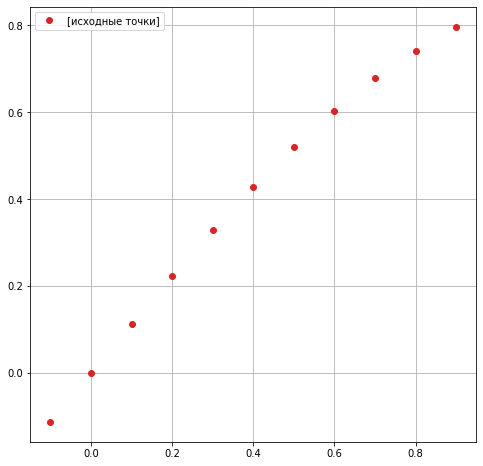

In [193]:
fig1=plt.figure(figsize=[8,8])
x=np.array([(i-1)/10 for i in range(11)])
print (x)
y=np.array([erf(i) for i in x])
print (y)

plt.plot(x, y, 'o', color='tab:red', label='[исходные точки]')
plt.grid()
plt.legend()
pass


Исходя из лекции №6 мы можем сделать вывод, что система линейных уравнений имеет матрицу Вандермонда и если ввести также векторы то мы получим, что система принимает вид $Wa = y$.

Найдем саму матрицу и с её помощью ,применив функцию из условия задачи, находим число обусловленностей этой системы

In [194]:
wd = np.vander(x)
np.linalg.cond (wd)

48418951.19728199

Мы видим, что кол-во обусловленностей этой системы велико. Из этого мы можем сделать вывод, что погрешности 
при расчетах могут сильно исказить решение.

Теперь с помощью функций f=np.polyfit(x, y, n) и linalg.solve(wd, y) находим коэффициенты интерполяционного многочлена. После чего сравним полученный результат

In [195]:
linalg.solve(wd, y)

array([-1.81541514e-03,  6.99182420e-03, -9.06336489e-04, -2.66590511e-02,
        1.42861748e-05,  1.12819182e-01,  3.51775802e-06, -3.76126475e-01,
       -3.56817061e-08,  1.12837917e+00,  0.00000000e+00])

In [196]:
fnc = np.polyfit(x, y, 10)
print (fnc)

[-1.81541513e-03  6.99182413e-03 -9.06336372e-04 -2.66590512e-02
  1.42862435e-05  1.12819182e-01  3.51776266e-06 -3.76126475e-01
 -3.56817459e-08  1.12837917e+00 -3.28313492e-16]


При использовании двух различных функций для одной задачи получаем почти идентичные результаты.
Различие между ними заключается только в последнем значении. 

Но это решение скорее всего не достоверное, так как из-за большого количества обусловленностей конечный результат может сильно измениться. Поэтому совершим проверку. При верном результате полученные значения должны быть равны y.

In [197]:
ytr=np.dot(fnc,wd)
print(y)
print(ytr)

[-0.11246292  0.          0.11246292  0.22270259  0.32862676  0.42839236
  0.52049988  0.60385609  0.67780119  0.74210096  0.79690821]
[0.11889633 0.14768757 0.18306701 0.22629366 0.27870973 0.34164658
 0.41628369 0.50349569 0.60371677 0.71692024 0.84270067]


Результат проверки показал, что эти значения абсолютно не совпадают и погрешность всетаки присутствует.

Расчитаем абсолютную и относительную погрешность. За усредненный результат примем 0.5

In [198]:
np.polyval(fnc, 0.5)
absp=abs(np.polyval(fnc, 0.5)-y[5])
otnosp=absp/y[5]
print('абсолютная погрешность=',absp)
print ('относительная погрешность=',otnosp)

абсолютная погрешность= 0.09210752276637774
относительная погрешность= 0.21500739142822395


Теперь протабулируем значение функции в промежуточных точках.

In [199]:
np.polyval(fnc, [[0.1, 0.125, 0.150, 0.175, 0.2]])

array([[0.11246292, 0.1403162 , 0.16799597, 0.19546894, 0.22270259]])

Построиv кубический эрмитов интерполнят, кубический сплайн и сравниv результаты

[[0.11246292 0.14031585 0.16799545 0.19546869 0.22270259]] KS
[[0.11246292 0.14028076 0.16799542 0.19550375 0.22270259]] KEI


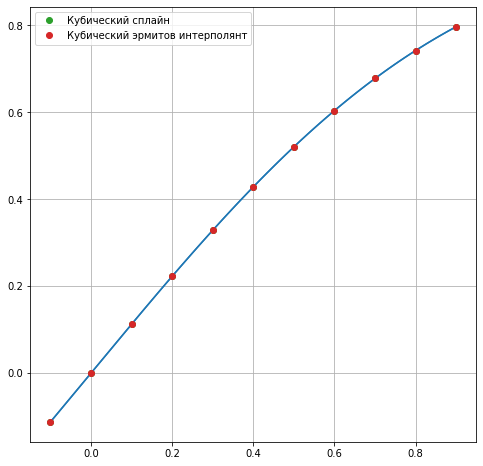

In [200]:
fig1=plt.figure(figsize=[8,8])
kusp= interpolate.interp1d(x, y, kind = 'cubic')
znach = [[0.1, 0.125, 0.150, 0.175, 0.2]]
print(kusp(znach),'KS') 
mnx = np.linspace(np.min(x), np.max(x), 500)
plt.plot(mnx, kusp(mnx), color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:green', label='Кубический сплайн')
keint = interpolate.pchip(x, y)
print(keint(znach), 'KEI')
plt.plot(mnx, keint(mnx),   color = 'tab:blue')
plt.plot(x, y, 'o', color = 'tab:red', label='Кубический эрмитов интерполянт')
plt.grid()
plt.legend()
pass

#### Значения интерполянтов в промежуточных точках совпадают.

По данному графику явно видно, что что значения интерполянтов в промежуточных точках совпадают и абсолютно идентичны или стремятся быть таковыми